<font size=6>**Machine Learning Practises**</font>

In this session we will focus on fundamental principles of the **Machine Learning** (**ML**) approach.<br>
We will:

- formalize some **concepts** encountered in previous classes
- outline procedural **protocols**
- highlight **good practises** and common **mistakes**

_What is **Machine Learning**?_
<br>
It is a branch of Artificial Intelligence (AI) which regards the creation of algorithms that can improve their performance through experience and data.

<table><tr>
    <td width=640>
        <img src="images/ML_AI.png">
        <center>
            <br>
            Figure 0.  Relationship between ML and AI.
            <br>
            (From <a href="https://www.researchgate.net/figure/Relationship-between-artificial-intelligence-AI-machine-learning-ML-and-deep_fig1_338083201">here</a>)
        </center>
    </td>
</tr></table>

Differently from the hard-coded approaches followed by traditional modelling, ML proposes a **train-application** scheme.

The idea is that:
- a machine (a computer) can learn the **parameters** of an arbitrarily complex model by **training** over some input **data**
- once the model is trained, the machine can predict the response for previously **unseen data**.

# Basic ingredients for a successful ML model

1. **Clean data**<br>
    > _"garbage in, garbage out"_<br>
    > _~any data analyst on the internet_

2. **Test and training samples**
    > _Divide et impera_

3. **Metrics of performance**
    > _Is this a bug or a feature?_

## Data visualization

In [1]:
from sklearn.datasets import make_classification
from prettytable import PrettyTable
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=100, n_features=3, n_informative=1,
                           n_redundant=1, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, weights=None, flip_y=0.01,
                           class_sep=1.0, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

feature_names = ["X"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Displaying first 5 rows:
display(df_data.head(10))

+-------------------+
|     Data shape    |
+----------+--------+
|    X     |   y    |
+----------+--------+
| (100, 3) | (100,) |
+----------+--------+


,X0,X1,X2,y
0,0.452936,0.822647,-1.082046,0.0
1,1.405205,0.615728,-0.809881,0.0
2,0.878674,-0.723488,0.951621,1.0
3,1.209382,-0.721496,0.949001,1.0
4,1.403959,0.730866,-0.961326,0.0
5,-0.205867,-0.922984,1.214023,1.0
6,0.102348,0.702073,-0.923454,0.0
7,-0.963016,-1.101895,1.449348,1.0
8,1.043861,0.702422,-0.923913,0.0
9,0.041980,-0.373470,0.491234,1.0


### Quick visualization: corner plot with seaborn

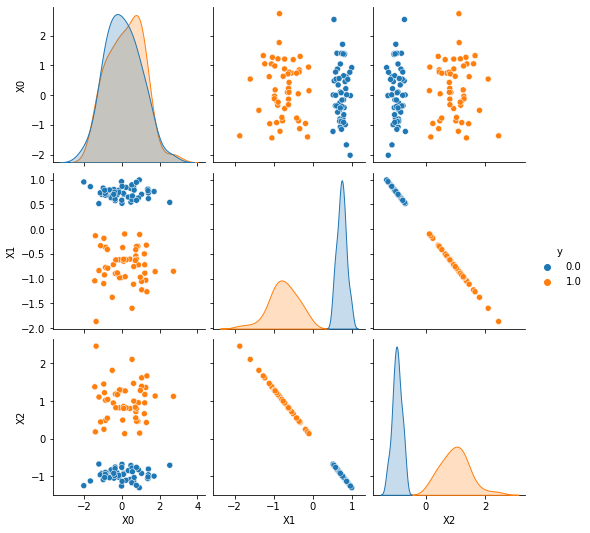

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corner plot:
sns.pairplot(df_data, hue="y")
plt.show()

Which features are:
- redundant?
- informative?

<details>
<summary><b>[Spoiler]</b></summary>
We just need X$_{1}$ or X$_{2}$ for the classification of these data!
</details>

### Covariance and Correlation matrices

We can see the redundancy in a quantitative way, by calculating and displaying the **covariance** and the **correlation** between each pair of features.

> **Covariance** $\rightarrow Cov(X, Y)$ = ${{1}\over{1-N}} \sum_{i=1}^{N} (x_i - E(X))~(y_i - E(Y))$
>
> **Correlation** $\rightarrow Cor(X, Y)$ = ${{Cov~(X, Y)}\over{\sigma_X ~ \sigma_Y}}$ 

We can additionally plot the significance of the correlation, using the $p$-values from a Pearson correlation test (see Hypothesis Testing session!).  Using the `scipy.stats.personr` package ([link](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)) words:


>_The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets._

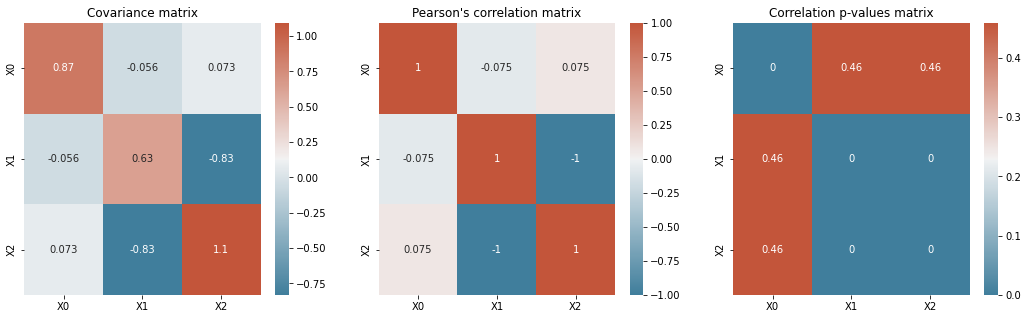

In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
     
# Covariance matrix:
cov = np.cov(X.T)

# Pearson's correlation and p-value matrices:
#  See: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
cor   = np.zeros((np.shape(X)[1], np.shape(X)[1]))
pvals = np.zeros((np.shape(X)[1], np.shape(X)[1]))

for i in range(np.shape(X)[1]):
    for j in range(np.shape(X)[1]):
        cor[i, j], pvals[i, j] = pearsonr(X[:, i].ravel(), X[:, j].ravel())

# Plotting -------------------------------------------------------------------

# Configure a custom diverging colormap:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Configure a custom diverging colormap:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Converting matrices to dataframes for plotting with seaborn:
def convert_M_to_pd(M, feature_names):
    df = pd.DataFrame(data=M, columns=feature_names)
    df = df.rename(index={i: feature_names[i] for i in range(len(feature_names))})
    return df

df_cov   = convert_M_to_pd(cov, feature_names)
df_cor   = convert_M_to_pd(cor, feature_names)
df_pvals = convert_M_to_pd(pvals, feature_names)

# If you wish to mask the upper (redundant) traingle, uncomment this:
# mask_cor = np.triu(np.ones_like(cor, dtype=bool))
# mask_cov = np.triu(np.ones_like(cov, dtype=bool))
mask_cor = None
mask_cov = None

plt.rcParams['figure.figsize'] = [18, 5]

plt.subplot(1,3,1)
plt.title("Covariance matrix")
sns.heatmap(df_cov, annot=True, mask=mask_cov, cmap=cmap)

plt.subplot(1,3,2)
plt.title("Pearson's correlation matrix")
sns.heatmap(df_cor, annot=True, mask=mask_cor, cmap=cmap)

plt.subplot(1,3,3)
plt.title("Correlation p-values matrix")
sns.heatmap(df_pvals, annot=True, mask=mask_cor, cmap=cmap)

plt.show()
#-----------------------------------------------------------------------------

To get rid of redundant features, we may apply a threshold on **covariance** or **correlation**, and remove one of the two redundant variables.

However, watch out! These matrices only present the _linear_ relations!

### Exploring datasets with many features

Let's look at the same techniques seen above, when the number of features is untractable.

In [4]:
from sklearn.datasets import make_classification
from prettytable import PrettyTable
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=100, n_features=1000, n_informative=700,
                           n_redundant=300, n_repeated=0, n_classes=5,
                           n_clusters_per_class=2, weights=None, flip_y=0.01,
                           class_sep=3.0, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

feature_names = ["X"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Displaying first 5 rows:
display(df_data.head(10))

+----------------------+
|      Data shape      |
+-------------+--------+
|      X      |   y    |
+-------------+--------+
| (100, 1000) | (100,) |
+-------------+--------+


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X991,X992,X993,X994,X995,X996,X997,X998,X999,y
0,-2.647366,-88.922239,-7.068578,11.137889,35.776582,96.575738,29.860902,443.330442,1.671341,-2.259888,...,-287.569629,-96.876771,42.639459,2.873824,34.588678,270.293960,16.867636,86.294601,-20.055073,1.0
1,0.303599,488.146400,-11.655986,16.662788,-8.042495,60.763250,31.553206,25.341122,-8.223037,6.548629,...,-235.035785,-153.645781,-265.759808,8.681126,-12.269253,124.128422,-6.762777,-24.143037,-22.522241,0.0
2,-33.733922,-434.235740,-4.363811,24.118921,-16.632986,23.081932,2.941883,138.272786,6.349949,-7.970398,...,-121.741798,-61.090955,296.137439,0.095102,-7.840677,-101.597495,10.388838,41.586227,-8.130502,3.0
3,-16.636395,349.899914,-11.051520,8.245455,11.915853,-229.978208,-6.116896,-0.902277,-4.866955,-12.284112,...,-230.831973,246.040991,63.847577,-21.554586,0.936717,-42.255315,-1.368944,-180.862473,-17.757477,4.0
4,-16.193111,-135.128031,-16.512942,-17.409030,-21.175899,361.365687,-6.289552,-496.564243,37.530768,17.997715,...,-329.705227,-221.084381,495.914948,-6.715367,7.657304,38.749464,1.571831,-246.355772,-36.233830,4.0
5,7.449476,18.990661,-2.364613,1.643904,-10.039204,187.728722,-3.619225,-339.463824,10.091592,-11.783346,...,-45.014565,-257.968294,301.933399,-1.522453,-28.297558,-76.704088,-0.337517,-168.821279,22.641115,4.0
6,2.893913,272.120627,-39.932996,-18.926207,-7.194259,148.648908,3.138724,-183.354953,-14.445362,-22.614169,...,45.124269,-183.717585,-59.906030,7.324679,45.255144,258.043300,-3.602528,2.239195,-4.136834,1.0
7,6.678930,-100.386210,-14.773654,-10.363041,-1.095764,-270.279927,-3.068530,-176.684436,-8.121597,-0.653335,...,-233.637891,236.642013,288.363511,2.338963,-18.913177,73.943140,-26.094887,-158.727970,11.428367,0.0
8,4.213830,262.821485,7.356739,35.008582,7.437899,31.713658,3.549886,-83.840782,1.307964,13.810937,...,155.920172,-581.279263,-10.892825,6.554395,31.077511,-286.945439,-3.905652,-166.054068,4.251880,1.0
9,3.266033,285.608616,8.168600,22.609275,-14.405013,35.968654,7.135934,240.558499,-5.525046,-19.307513,...,-8.018408,-63.986758,-284.425067,-10.568216,-4.499747,-292.752102,11.619476,220.843444,-1.785912,0.0


We will display only the last 7 features, since it is impractical to display them all.

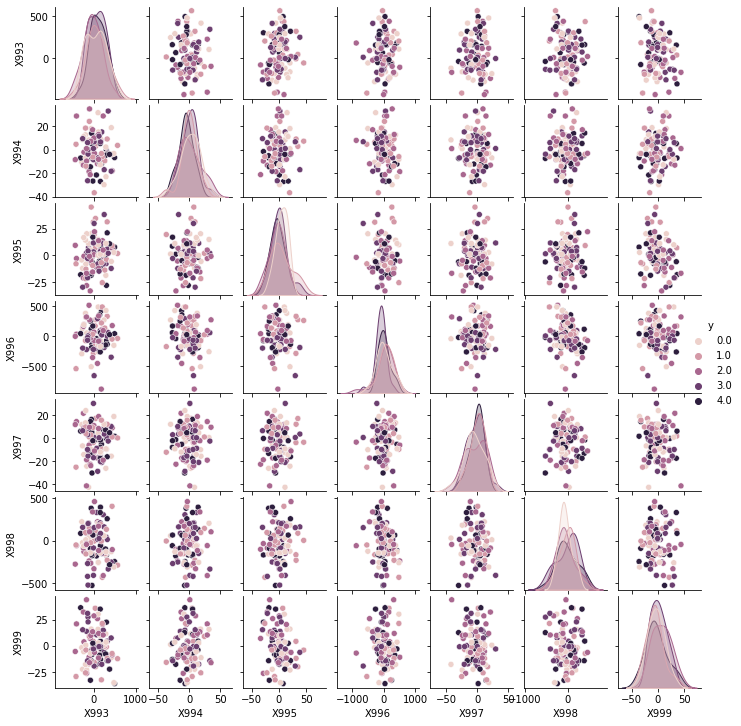

CPU times: user 9.33 s, sys: 359 ms, total: 9.69 s
Wall time: 8.91 s


In [5]:
%%time
# This might take 10+ seconds to plot ...

import seaborn as sns
import matplotlib.pyplot as plt

# Corner plot:
g = sns.pairplot(df_data.iloc[:,-8:], hue="y")
g.fig.set_size_inches(10,10)
plt.show()

Similarly, we cannot visualize the full correlation matrix, so we might just calculate it and sort it by correlation value.

We might only print the significant correlations, e.g. those above 0.5 or below -0.5.

_Some other useful tricks can be found [here](https://likegeeks.com/python-correlation-matrix/)._

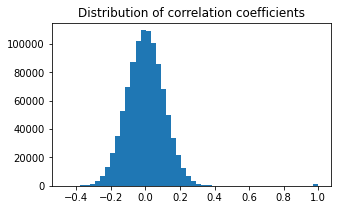

Top 5 Significant correlations (excluding same-variable):


,feature_A,feature_B,Cor
0,X602,X481,-0.442438
1,X973,X539,0.458424
2,X539,X973,0.458424
3,X41,X737,-0.468763
4,X737,X41,-0.468763


CPU times: user 774 ms, sys: 44.2 ms, total: 818 ms
Wall time: 818 ms


In [6]:
%%time
df_cor = df_data[feature_names].corr()
# NOTE1: This time we used a pandas tool to calculate the correlation
#        matrix (while before we used the equivalent numpy tool) just
#        to show an alternative method for the same thing.
#        This returns a pandas dataframe.

cor_pairs = df_cor.unstack()
# converting correlation dataframe to 1D series

cor_pairs_sort = cor_pairs.sort_values(kind="quicksort")

fig = plt.figure(figsize=(5,3))
plt.title('Distribution of correlation coefficients')
plt.hist(cor_pairs, bins=50)
plt.show()

df_sorted_pairs = pd.DataFrame(cor_pairs_sort).reset_index()
df_sorted_pairs.columns=['feature_A', 'feature_B', 'Cor']

# Let's exclude same-variable correlations, which are 1 by definition:
df_nonsame = df_sorted_pairs[ df_sorted_pairs['feature_A'] != df_sorted_pairs['feature_B'] ]

# Let's sort by absolute value:
df_sorted = df_nonsame.sort_values(by='Cor', key=abs)

# Let's keep the top 10 significant correlations:
df_significant_5 = df_sorted.iloc[-5:, :].reset_index(drop=True)

print('Top 5 Significant correlations (excluding same-variable):')
display(df_significant_5)

**Ah! Why this time we cannot spot the redundant features?!**

Meaning, why we do not see anything close to a 1-to-1 correlation, despite having requested `sklearn.datasets.make_classification` to include redundant features?

This is because a "redundant" feature might be a _linear combination_ of the informative features!

SUMMARY: Life is more complicated than simple 1-to-1 relationships, unfortunately, so we cannot easily spot redundant features ...

_PS: Additionally, remember that the correlation/covariance matrix is ill-defined (singular) for $n_{features}$ > $n_{samples}$.
     A nice explanation can be found [here](https://stats.stackexchange.com/questions/60622/why-is-a-sample-covariance-matrix-singular-when-sample-size-is-less-than-number)._


What can we do, when we face a large number of features?
> - Sit in the corner and cry
> - Visualize data with some tricks (see [$\S$Feature reduction](#Feature-reduction))

## Golden rule and data splitting

<table><tr>
    <td width=640>
        <img src="images/Train_Validation_Test.png">
        <center>
            <br>
            Figure 1.  Indicative recipe for splitting a dataset into the analysis sets.<br>
            For very large datasets (above 10$^5$ entries), the percentages of validation and test can be substantially smaller.
            <br>
        </center>
    </td>
</tr></table>


What are the different sets for? We already had a hint from the _Classification_ and _Clustering_ sessions.

- **Train** set $~~~~~~\rightarrow$ Learn the model parameters

- **Validation** set $\rightarrow$ Check that the learnt model is not overfitting/underfitting the train set

- **Test** set $~~~~~~~\rightarrow$ Assess the model performance

Looks obvious. Right? Let's see:

- - -
Algorithm **Do_Classification**

**Input**: **$X$** (data matrix), $y$ (labels), classifier<br>
**Output**: classifier accuracy

- - -
> 1. **Normalize data**<br>
> $\mu_X$ $\leftarrow$ $mean~$(**$X$**)<br>
> $X_n$ = $X$ / $\mu_X$
>
>
> 2. **Split train/test**<br>
> $indexes\_train, indexes\_test \leftarrow split\_indexes(~size(X)~)$<br><br>
> $X_n\_train \leftarrow X_n~[indexes\_train]$<br>
> $X_n\_test ~~\leftarrow X_n~[indexes\_test]$<br>
> $y\_train \leftarrow~y~[indexes\_train]$<br>
> $y\_test ~~\leftarrow~y~[indexes\_test]$<br>
>
>
> 3. **Train on $train$ set**<br>
> <code>classifier.fit</code>($X_n\_train, y\_train$)
>
>
> 4. **Predict $test$ labels with trained classifier**<br>
> $\hat{y}\_test$ $\leftarrow$ <code>classifier.predict</code>($X_n\_test$)
>
>
> 5. **Calculate accuracy**<br>
> $acc \leftarrow calculate\_accuracy~(\hat{y}\_test, y\_test)$<br>
> return $acc$
- - -

Where was the mistake?

<details>
<summary><b>[Spoiler]</b></summary>    
    
<table><tr>
    <td width=1600>
        <img src="images/Refit.png">
        <center>
            <br>
            Space-time continuum is at risk when you use the test data during the <i>learning</i> process.
        </center>
    </td>
</tr></table></details>

<font size=4><center>**Golden Rule of Machine Learning**</center></font>
<center>Treat the <b>test</b> data as if they come from the future!</center>

## Metrics of performance

### Classification

Let's consider the **Confusion Matrix** for a **binary** classification (the problem can be easily generalized to _multi_-class):

<table><tr>
    <td width=640>
        <img src="images/Confusion_Matrix.jpg">
        <center>
            <br>
            Figure 2.  Confusion Matrix for a binary classification problem.
            <br>
            (From <a href="https://www.r-bloggers.com/2020/12/weighting-confusion-matrices-by-outcomes-and-observations/">here</a>)
        </center>
    </td>
</tr></table>

- - -

By combining these quantities, we can create different **metrics of performance**, e.g.:

**True Positive Rate (TPR)**:

$$TPR = Recall = Sensitivity = {TP \over TP + FN}$$

**False Positive Rate (FPR)**:

$$FPR = (1 - Specificity) = {FP \over TN + FP}$$

**Precision**:

$${TP \over TP + FP}$$

**Accuracy**:

$${TP + TN \over P + N}$$

<br>

**Q:** What **metric of performance** shall we maximize, to optimize our model parameters?<br>
**R:** <u>It depends on the objective of the model.</u>

For example, if we need: 

 - to identify best follow-up candidates of GW sources, we want to waste no precious time on wrong targets

 _$\rightarrow$ we want to minimize our contamination (FP) $\rightarrow$ we care for **Precision**_


 - to create a catalog of OB stars, with conservative candidates for that class:

 _$\rightarrow$ we want to minimize our rejections (FN) $\rightarrow$ we care for **Recall**_ 


or just get a good mix of TP and TN across the classes $\rightarrow$ _**Accuracy**_
<br><br>

- - -

But there is more: we need to decide the **threshold**: i.e.,  the _probability score_ at which an object is classified as class 0 or 1.

<br>
<center><i>By default, we and <code>sklearn</code> classifiers assume <b>50%</b> as the score threshold</i></center>

... but it can be changed!  For example, considering the previous scenarios:

 - to identify best follow-up candidates of GW sources, we want to waste no precious time on wrong targets

  _$\rightarrow$ **increase** threshold $\rightarrow$ reduce contamination (FP), at the risk more rejections (FN)$\rightarrow$ maximize **Precision** (but decrease **Recall**)_


 - to create a catalog of OB stars, with conservative candidates for that class:

  _$\rightarrow$ **decrease** threshold $\rightarrow$ reduce rejections (FN), at the cost of contamination (FP) $\rightarrow$ maximize **Recall** (but decrease **Precision**)_ 

Therefore, the  **metrics** change based on the chosen threshold.
<br><br>

**Q:** Can I visualize my classifier's expected behaviour when changing the threshold?<br>
**R:** Yes, plot the **Receiver Operating Characteristic (ROC)** curve.

The **ROC** shows the classifier's **TPR** and **FPR** across all possible classification thresholds.


<table><tr>
    <td width=640>
        <img src="images/ROC.png">
        <center>
            <br>
            Figure 2.  Example of a Receiver Operating Characteristic (ROC) with an AUC of 0.79.
            <br>
            (From <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py"><code>sklearn</code> ROC page</a>)
        </center>
    </td>
</tr></table>

- - -

**Q:** Right, but what is the _best_ model **over all thresholds**?!<br>
**R:** We can claim it is the one that strikes the <u>best balance</u> between **TPR**s and **FPR**s  across all possible classification thresholds.

The **Area Under the ROC Curve (AUC)** measures exaclty this.

NOTE: 

- The 1-to-1 line in Figure 2 indicates a **random** classifier (in binary case, it means it randomly assigns class 1 or 0).<br>
  For this reason, the minimal AUC is _de facto_ 0.5.
- The **furthest** from the 1-to-1 line, the **better** the classifier.
- The **ideal** classifier has AUC = 1.

For more info about the interpretation of the AUC, you can read [this page](https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation-28ec3983f077) and [this post on Google Developers](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc).

<br>

<font size=3><u>**Is AUC a metric superseeding all the others?**</u><font>

- In general: <u>no</u>, they measure different things
    
  _AUC gives performance across all thresholds, but in practice you you pick **one** threshold when you use the model_  
  

    
- If your classes are heavily unbalanced: <u>probably</u>

  _In this case it is possible that you don't know the right threshold anyways_
    
You can find an interesting discussion about this topic [here](https://datascience.stackexchange.com/questions/806/advantages-of-auc-vs-standard-accuracy).

### Regression

In regression problems, we have to compare a numerical $y$ against its predicted value $\hat{y}$.

Among the most used metrics are those which:

- evaluate the **residuals**, e.g.:<br><br>

  - **Mean Absolute Error (MAE)**
$$MAE = {1 \over N}\sum_i^N{|  y_i-\hat{y_i} |}$$

  - **Mean Squared Error (MSE)**
$$MSE = {1 \over N}\sum_i^N{(y_i-\hat{y_i})^2}$$

- evaluate the [expected linear] **correlation**, e.g.:<br><br>
  - **Coefficient of Determination (R^2)**
$$R^2 = 1 - {\sum_i^N{(y_i-\hat{y_i})^2} \over \sum_i^N{(\bar{y_i} - y_i)^2}} $$, 


<font size=3><u>**Warning about relative metrics**</u><font>

Most of metrics based on residuals are "<u>absolute</u>".
    
When your $y$ has a large dynamic range, you would be tempted to use <u>relative</u> metrics, e.g. **Mean Absolute Percentage Error (MAPE)**:
    
$$MAPE = {100 \over N}\sum_i^N{\bigg|  {y_i-\hat{y_i} \over y_i} \bigg|}$$

But be careful! For values of $y \sim 0$ these metrics _might_ explode! $\rightarrow$ they compromize the convergence of algorithms!

### Sklearn metrics

You can find a list of <code>sklearn</code> metrics for **Classification**, **Regression**, and **Clustering** at [this docs page](https://scikit-learn.org/stable/modules/model_evaluation.html).

## Comparing against baseline

In [7]:
import numpy as np
import pandas as pd

x1 = np.random.randint(10, size=10)
x2 = np.random.randint(10, 20, size=10)
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
df_data = pd.DataFrame(np.array([x1, x2, y]).T, columns=['x1', 'x2', 'class'])

display(df_data)

,x1,x2,class
0,4,18,0
1,4,11,0
2,2,19,1
3,7,16,0
4,8,15,0
5,8,15,0
6,3,11,0
7,3,17,0
8,5,12,0
9,3,18,0


In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X = df_data[['x1','x2']].values
y = df_data[['class']].values.ravel()

clf = LogisticRegression(random_state=42)
clf.fit(X, y)

print('LogisticRegression | accuracy: %.2f' % clf.score(X, y))

LogisticRegression | accuracy: 1.00


How good is this result?

<details>
<summary><b>[Spoiler]</b></summary>    
    
A **Majority Class** classifier, i.e. a _trivial_ classifier which always returns the most frequent class seen in training, would have scored 90% accuracy!

</details>

<font size=3><u>**Always compare against dummy estimators!**</u><font>

... or at least keep in mind the minimum achievable score $=$ **baseline**.  Having a comparison reference is <u>very important</u> when publishing, to convince about the goodness of your model.
    
In some cases, the baseline can also be found **theoretically**, it does not matter. 

Some examples of dummy estimators:
    
 - <u>Classification</u>:
   - **Random (Trivial) Classifier**: a classifier which returns a random class
   - **Stratified Classifier**: a classifier which returns a class with a probability following the distribution of classes seen in training
    
    [<code>sklearn</code> Dummy Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
    
        
 - <u>Regression</u>:
   - **Constant Regressor**: a regressor which alwyas returns a value, e.g. the mean($y_{train}$) or median($y_{train}$)
    
    [<code>sklearn</code> Dummy Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

Create your own based on the problem you are addressing!

# Refining your data

## Encoding (Sometimes a necessity!)

Some algorithms can natively deal with all data types (e.g. **Random Forests**), but others only expect numerical inputs.

**_Encoding_** is a method to deal with **categorical** data as if they were binary.

In [9]:
import pandas as pd

df = pd.DataFrame([], columns=['Galaxy', 'Morphology', 'Something'])
df['Galaxy']     = ['NGC4261', 'NGC4452', 'M31', 'M51', 'Hoag']
df['Morphology'] = ['elliptical', 'elliptical', 'spiral', 'spiral', 'ring']
df['Something']  = [10, 65, 78, 98, 35]

display(df)

,Galaxy,Morphology,Something
0,NGC4261,elliptical,10
1,NGC4452,elliptical,65
2,M31,spiral,78
3,M51,spiral,98
4,Hoag,ring,35


How can we deal with categorical data which are **not ordinal**, i.e. they don't have a specific order, such as "_Morphology_"?

If we were to attribute **integer** values, e.g.:
- elliptical = 0
- spiral$~~~~$ = 1
- ring$~~~~~~~$= 2

we would get into <u>trouble</u> when using algorithms that would consider the "distance" between two consecutive classes.<br>
In this case, an algorithm will see '_elliptical_' closer to '_spiral_' than to '_ring_', for no real reason.

- - -

A solution is **One Hot Encoding (OHE)**!

> OHE consists in creating arrays of **0** and **1**, which uniquely identify the class.

We can do this with <code>pandas</code>:

In [10]:
pd.get_dummies(df, columns=['Morphology'])

,Galaxy,Something,Morphology_elliptical,Morphology_ring,Morphology_spiral
0,NGC4261,10,1,0,0
1,NGC4452,65,1,0,0
2,M31,78,0,0,1
3,M51,98,0,0,1
4,Hoag,35,0,1,0


.. or with <code>sklearn</code>.<br>
It is a bit more complex but useful when we want to apply the **same** encoding to an other set, e.g.:

In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

X_train = [['elliptical'], ['elliptical'], ['spiral'], ['spiral'], ['ring']]
# NOTE: sklearn methods always want a 2D input

X_train_ohe = enc.fit_transform(X_train).toarray()

print('Encoding of input data:\n\n%s\n' % X_train_ohe)

# Now converting a new example - say we want to convert "spiral":

X_test = [['spiral']]

X_test_ohe = enc.transform(X_test).toarray()

print('Encoding of test data ("spiral"):\n\n%s\n' % X_test_ohe)

Encoding of input data:

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]

Encoding of test data ("spiral"):

[[0. 0. 1.]]



<font size=3><u>**Warning: OHE creates co-linearity!**</u><font>

This is because we can deduce one class given the others, e.g., if:
    
    Morphology_elliptical = 0 and Morphology_ring = 0

then, necessarily:
    
    Morphology_spiral = 1
    
$\rightarrow$ we are introducing a correlation between the "dummy" features.
 
This is an issue for algorithms which assume **feature independence** (e.g. _linear models_, _Logistic Regression_, _Naive Bayesian Classifier_).

<br>
    
<font size=3><u>**To drop or not to drop?**</u><font>
    
We can bypass this issue by **dropping** one dummy class:

In [12]:
pd.get_dummies(df, columns=['Morphology'], drop_first=True)

,Galaxy,Something,Morphology_ring,Morphology_spiral
0,NGC4261,10,0,0
1,NGC4452,65,0,0
2,M31,78,0,1
3,M51,98,0,1
4,Hoag,35,1,0


We are _not_ losing information because we can always reconstruct the third class given the other 2.

**But** ... this opens lots of debates $-$ e.g.:
- _Which class shall I drop?_
- _How do I interpret my results?_
 
This post presents a comprehensive [discussion on dropping OHE columns](https://inmachineswetrust.com/posts/drop-first-columns/).

<br>

<font size=3><u>**TL;DR**</u><font>

Most times you should probably be fine <u>without</u> dropping columns.

## Scaling features

NOTE: "Scaling" shall be interpreted as a generic form of **normalization**.

### When do you need to normalize?

- Normalizing is <u>fundamental</u> when adopting algorithms that make use of **distance**.

    _Example: **SVM**, **$k$NN**, or some **hierarchical clustering**<br>
    $k$NN Measures the distance between a _test_ point $\hat{X}$ and all the _training_ points $X_i$: e.g. || $\hat{X}$ -  ${X_i}$ ||$^2$
  
  
- Normalizing is <u>fundamental</u> when adopting algorithms that **compare** the contribution of **features**.

     _Example: **PCA**_<br>
     PCA requires to scale and center features around 0 [$\S$Feature reduction](#Feature-reduction)


- Normalizing <u>is not necessary</u> with algorithms which look at each feature **independently**

    _Example: **Random Forests**_<br>

<br>

... However, normalizing features is usually a good habit because:

- Scaling <u>helps</u> convergence when features have very different **dynamic ranges**.
 
    _Example: algorithms using **gradient descent** (including **neural networks**)_<br>



<font size=3><u>**Example**</u><font>

Let's try to see what happens to the accuracy when we try a $k$NN classifier **with** and **without** normalizing.
    
> 3 classes, 2 features.

Accuracy on non-normalized data: 0.59
Accuracy on normalized data: 0.66


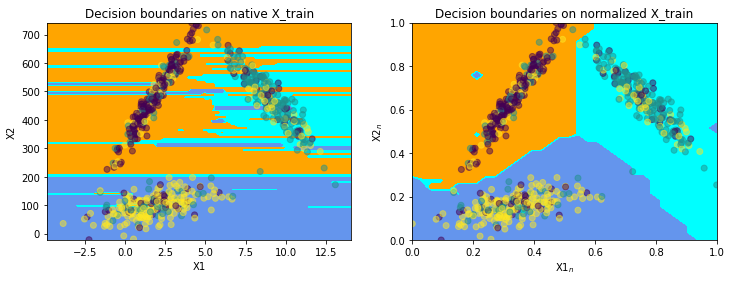

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Let's create the usual mock data:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2, flip_y=0.5,
                           shift=3, scale=None, random_state=42)
# NOTE1: We set "scale" to "None" to generate randomly scale features!
# NOTE2: flip_y=0.5 makes the classification more difficult!

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)

# Let's fit directly:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print('Accuracy on non-normalized data: %.2f' % clf.score(X_test, y_test))

# Now, let's normalize with respect to the max of each feature, and re-fit:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n  = scaler.transform(X_test)

clf_n = KNeighborsClassifier(n_neighbors=10)
clf_n.fit(X_train_n, y_train)

print('Accuracy on normalized data: %.2f' % clf_n.score(X_test_n, y_test))

# Plotting decision boundaries:
# See:
#    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

fig, axes = plt.subplots(1, 2, figsize=(12,4))
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])

DecisionBoundaryDisplay.from_estimator(
    clf, X_train, cmap=cmap_light, ax=axes[0], response_method="auto")

axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5)

DecisionBoundaryDisplay.from_estimator(
    clf_n, X_train_n, cmap=cmap_light, ax=axes[1], response_method="auto")

axes[1].scatter(X_train_n[:,0], X_train_n[:,1], c=y_train, alpha=0.5)

axes[0].set_title('Decision boundaries on native X_train')
axes[1].set_title('Decision boundaries on normalized X_train')

axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[1].set_xlabel('X1$_n$')
axes[1].set_ylabel('X2$_n$')

axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])

plt.show()

### Types of scalers

Theoretically, infinite.

The <code>sklearn</code> library implements several scalers:
- check this [showcase of <code>sklearn</code>scalers](https://scikit-learn.org/stable/modules/preprocessing.html) 
- check the [effects of different scalers on outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) for their effects on oultiers

<table><tr>
    <td width=1600>
        <img src="images/Scalers_Showcase.png">
        <center>
            <br>
            Figure 3. A showcase of the effect of different <code>sklearn</code> scalers applied to different distributions.
            (From <a href="https://scikit-learn.org/stable/modules/preprocessing.html">here</a>)
        </center>
    </td>
</tr></table>

### Regression: do I need to normalize $y$ ?

In regression problems, $y$ is a **continuous** variable (i.e., not a _label_, as for classification).

Shall we normalize it?

> **Depends on the specific problem** $\rightarrow$ try it out.<br>
> _e.g., you might want to fit better some ranges or equally at all ranges_

## Feature Engeneering

### Feature construction (dipoles, colors)

Let's use Kaggle's [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)

In [14]:
import pandas as pd

df_star = pd.read_csv("data/star_classification.csv")
df_star = df_star.sample(n=100, random_state=12)
# keeping only a few objects to make the problem more difficult

display(df_star.head(5))

print('Class demographics:')
display(df_star.groupby(['class']).count())

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
23441,1.237658e+18,135.560105,44.898721,22.30567,21.43649,19.75798,18.96968,18.53585,2863,301,2,90,5.278428e+18,GALAXY,0.429219,4688,56008,760
90125,1.237653e+18,311.061235,-5.441456,17.91316,16.73492,16.57163,16.53089,16.53141,1737,301,5,25,2.157348e+18,STAR,-0.000100,1916,53269,450
57892,1.237650e+18,176.967168,-1.766684,23.00886,22.49020,20.71650,19.74547,19.15290,1140,301,5,161,4.267350e+18,GALAXY,0.553427,3790,55208,688
7228,1.237668e+18,160.382606,19.280301,19.80938,17.89119,16.83623,16.35335,15.95283,5313,301,6,12,2.791195e+18,GALAXY,0.128453,2479,54174,324
99545,1.237661e+18,221.711029,40.864862,24.32647,23.16088,21.35538,20.36712,19.68588,3699,301,3,201,9.568083e+18,GALAXY,0.586078,8498,57105,674


Class demographics:


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
class,,,,,,,,,,,,,,,,,
GALAXY,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
QSO,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
STAR,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In particular, let's only use a few features:

In [15]:
import numpy as np

X = df_star[['u', 'g', 'r', 'i', 'z', 'redshift']]
y = np.array(df_star[['class']]).ravel()

display(X.head(5))

print('Number of features in X:', np.shape(X)[1])

,u,g,r,i,z,redshift
23441,22.30567,21.43649,19.75798,18.96968,18.53585,0.429219
90125,17.91316,16.73492,16.57163,16.53089,16.53141,-0.000100
57892,23.00886,22.49020,20.71650,19.74547,19.15290,0.553427
7228,19.80938,17.89119,16.83623,16.35335,15.95283,0.128453
99545,24.32647,23.16088,21.35538,20.36712,19.68588,0.586078


Number of features in X: 6


Let's first try a simple **Random Forests** classifier on the original data:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

print('==> Accuracy: %.2f' % clf.score(X_test, y_test))

==> Accuracy: 0.83


<font size=3><u>**Agnostic feature construcions**</u><font>

There are many _agnostic_ methods, but one basic feature construction is to create **all polynomial combinations** of the features.

E.g., the polynomials of degree 2 are:
    
> $X_1,~X_1^2,~X_1\cdot{}X_2,~X_2^2,~X_2,$ etc.

In [17]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_ext = pd.DataFrame(poly.fit_transform(X))

display(X_ext.head(5))

print('New number of features in X:', np.shape(X_ext)[1])

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,22.30567,21.43649,19.75798,18.96968,18.53585,0.429219,497.542914,478.155272,440.714982,423.131422,...,390.377774,374.802558,366.230954,8.480494,359.848759,351.619143,8.142141,343.577735,7.955933,1.842287e-01
1,17.91316,16.73492,16.57163,16.53089,16.53141,-0.000100,320.881301,299.775300,296.850260,296.120478,...,274.618921,273.943793,273.952410,-0.001650,273.270324,273.278920,-0.001646,273.287517,-0.001646,9.913225e-09
2,23.00886,22.49020,20.71650,19.74547,19.15290,0.553427,529.407638,517.473863,476.663048,454.320755,...,429.173372,409.057029,396.781053,11.465070,389.883586,378.183012,10.927676,366.833578,10.599732,3.062814e-01
3,19.80938,17.89119,16.83623,16.35335,15.95283,0.128453,392.411536,354.413381,333.515278,323.949724,...,283.458641,275.328762,268.585515,2.162659,267.432056,260.882212,2.100632,254.492785,2.049184,1.650010e-02
4,24.32647,23.16088,21.35538,20.36712,19.68588,0.586078,591.777143,563.422452,519.501011,495.460134,...,456.052255,434.947587,420.399448,12.515925,414.819577,400.944680,11.936727,387.533871,11.537467,3.434878e-01


New number of features in X: 27


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_ext, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

print('==> Accuracy: %.2f' % clf.score(X_test, y_test))

==> Accuracy: 0.93


$\rightarrow$ _That's some improvement (we got 0.83, before)!_

<font size=3><u>**Prior knowledge feature construcions**</u><font>

What we did before by creating polynomial was to **relate** _magnitudes_ ('u', 'g', 'r', 'i', 'z') with each other and with a _distance_ ('redshift').
    

But, since we are cool and smart _Astronomers_, we could as well used our Astrophysics intuition to create **colors**, which we know are distance-_invariant_ !

In [19]:
from itertools import combinations

df_mags = df_star[['u', 'g', 'r', 'i', 'z']]

cc = list(combinations(df_mags, 2))
df_colors = pd.concat([df_mags[c[0]].sub(df_mags[c[1]]) for c in cc], axis=1, keys=cc)
df_colors.columns = df_colors.columns.map('-'.join)

X_ext = df_colors

display(X_ext.head(5))

print('New number of features in X:', np.shape(X_ext)[1])

,u-g,u-r,u-i,u-z,g-r,g-i,g-z,r-i,r-z,i-z
23441,0.86918,2.54769,3.33599,3.76982,1.67851,2.46681,2.90064,0.78830,1.22213,0.43383
90125,1.17824,1.34153,1.38227,1.38175,0.16329,0.20403,0.20351,0.04074,0.04022,-0.00052
57892,0.51866,2.29236,3.26339,3.85596,1.77370,2.74473,3.33730,0.97103,1.56360,0.59257
7228,1.91819,2.97315,3.45603,3.85655,1.05496,1.53784,1.93836,0.48288,0.88340,0.40052
99545,1.16559,2.97109,3.95935,4.64059,1.80550,2.79376,3.47500,0.98826,1.66950,0.68124


New number of features in X: 10


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_ext, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

print('==> Accuracy: %.2f' % clf.score(X_test, y_test))

==> Accuracy: 0.73


_Argh!_ We got a worst result than using the magnitudes themselves (0.83)!<br>
_Well, Astronomy intuition is overrated, anyways!_

### Feature selection

We can use different algorithms based on how many assumptions we want to make about the data.

<font size=3><u>**Based solely on data properties**</u><font>
    
E.g., the <code>sklearn</code> selector <code>SlectKBest</code> allows to keep the best $k$ features based on some **statistical tests**.

For example, we can use the $\chi^2$ test to evaluate the dependency of $y$ from each feature, and select the top 2:

In [21]:
from sklearn.datasets import make_classification
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = make_classification(n_samples=100, n_features=10, n_informative=1,
                           n_redundant=1, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, weights=None, flip_y=0.01,
                           class_sep=1.0, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)
X = np.abs(X)
# NOTE: This is because the Chi2 test is assumed to work on counts or frequencies,
#       hence it expects only positive values

feature_selector = SelectKBest(chi2, k=2)

X_reduced = feature_selector.fit_transform(X, y)

# NOTE: Conveniently, the sklearn feature selectors have the same exact methods
#       as the classifiers, regressors, or any other sklearn estimator:
#         .fit()           -> learns the transformation
#         .transform()     -> applies the transformation
#         .fit_transform() -> learns and applies the transformation

print('Selected features: ', feature_selector.get_feature_names_out())

Selected features:  ['x1' 'x7']


<font size=3><u>**Based on some performance**</u><font>
    
We want to keep the features which yield the best **performance**.<br>
Yes, but which performance? $\rightarrow$ the one of **an estimator of our choice**!
(_e.g., for a classification problem, we need to pick a classifier._)

<br>

Let's see the case of a **Sequential Selector**, and more specifically, of a **_forward_** feature selector, applied to a classification problem. 

**Sequential Forward Selection (SFS) algorithm:**

The algorithm has to pick $p$ features among a set of input features $X = \{x_1, x_2, ... x_d\}$.<br>
Let's call $J(F)$ the score of the classifier when applied to the feature subset $F \subset X$.

> 1. Start from an empty set: $Y_k\{\emptyset\}$, $k=0$
>
>
> 2. Select the best remaing feature:
>
>    $x^+$ = $arg max J(Y_k + x)$ where $x \in X - Y_k$<br>
>    _This is the feature that, when added, maximises the score J of the classifier_
> 
>    $Y_{k+1} = Y_k + x^+$<br>
>    _Add the selected feature to the pool_
>
>    $k = k + 1$<br>
>    _Increase the counter_
>
>
> 3. Stop if $k = p$, else go to 2

The **_backward_** feature selector works similarly ...

The Python library <code>mlxtend</code> contains several **Sequential Selectors**,  ([docs](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/); but check also their other algorithms [link](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/)).

<br>

Let's try <code>mlxtend</code> SFS using a <code>sklearn</code> classifier to evaluate the performance:

In [22]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

clf = LogisticRegression(random_state=0)

sfs = SFS(clf, k_features=3, forward=True, floating=False, verbose=2, scoring='accuracy', cv=0)

sfs = sfs.fit(X, y)
# notice how mlxtend seamlessly integrates with sklearn ...

print('Selected features indexes: ', sfs.k_feature_idx_)

Selected features indexes:  (1, 2, 6)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-07-12 12:43:37] Features: 1/3 -- score: 0.61[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-07-12 12:43:37] Features: 2/3 -- score: 0.64[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-07-12 12:43:37] Features: 3/3 -- score: 0.65

<font size=3><u>**Final remarks on feature selection**</u><font>
    
- Remember the **Golden Rule** $\rightarrow$ Use only the **training set** to select (_not_ the _test_, for God's sake!)!

- Shall I use a different classifier (estimator) to **select features** and to **classify**? $\rightarrow$ Depends who you ask, both valid.

- Sequential Selection is **computationally expensive** (looks at many feature combinations) $\rightarrow$ May bu unfeasible for large datasets.

<font size=3><u>**A much more advanced agorithm**</u><font>
    
[-] [Bourboudakis & Tsamardinos, 2017](https://arxiv.org/abs/1705.10770): "_Forward-Backward Selection with Early Dropping_"<br>

> _Made in University of Crete!_

### Feature reduction

As seen above, visualizing multidimensonal data becomes quickly unfeasible as the number of features grows.

How can we get an hint of, e.g. outliers and clusters?

We can use tools that allow to "summarize" the features into a lower-dimensional space (**embedding**).<br>
For example, we can reduce to 2 or 3 dimensions, so that we can directly visualize the data.<br>

In [23]:
# Let's build a "easy" dataset with lots of features ...

from sklearn.datasets import make_classification
from prettytable import PrettyTable
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=500, n_features=1000, n_informative=900,
                           n_redundant=100, n_repeated=0, n_classes=5,
                           n_clusters_per_class=1, weights=None, flip_y=0.01,
                           class_sep=3.5, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)
# NOTE: <class_sep> sets how far apart are the clusters: larger values produce
#       easier sets, in the sense that they are more easily separable.

classes = np.unique(y)
print('There are %s classes' % len(classes))

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

feature_names = ["X"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Displaying first 5 rows:
display(df_data.head(10))

There are 5 classes
+----------------------+
|      Data shape      |
+-------------+--------+
|      X      |   y    |
+-------------+--------+
| (500, 1000) | (500,) |
+-------------+--------+


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X991,X992,X993,X994,X995,X996,X997,X998,X999,y
0,18.753347,31.753260,-23.650627,2.548072,8.596686,-28.583579,-5.314859,-6.037114,-16.426748,-22.057305,...,-5.155589,-4.458143,-12.913754,-10.303402,-30.848639,-4.378772,22.150511,12.411964,24.501223,3.0
1,25.935355,-19.217451,-11.399226,28.575180,-17.608636,12.687028,-4.723969,-4.807085,23.575929,3.719409,...,-12.709985,10.751886,36.817989,-28.951017,4.325479,6.135593,-6.864087,31.681151,-1.874406,2.0
2,2.239870,-9.187079,-21.562868,26.322170,3.507609,15.572349,-9.216051,-28.939832,-19.987572,12.663714,...,-13.948363,7.686522,20.842364,13.410973,-7.551833,-12.519048,-0.113958,19.139121,9.891073,0.0
3,13.170427,-24.080826,-15.317783,-4.634731,41.287431,-23.983270,-12.227098,-7.898186,-0.069511,-23.165332,...,-0.546686,20.171837,35.421932,-9.020447,24.416009,16.076251,7.452972,26.310219,-1.472834,3.0
4,19.356013,-9.309052,-2.729439,39.078334,24.691922,-24.663333,16.155363,1.181659,-21.635670,3.222789,...,5.416728,-10.170283,-18.654535,-22.473894,-4.623094,4.632362,22.772126,-13.357902,-15.573176,1.0
5,18.744215,-14.486791,21.431222,2.910772,-7.022182,-11.614316,24.065140,-12.569461,-4.524590,7.570091,...,39.086716,-43.228326,13.525194,-21.282335,22.088140,-3.721488,14.377459,-14.026895,3.796947,4.0
6,-5.394182,-8.290815,-19.915885,-17.529863,-5.423723,3.634003,-25.482609,5.171415,5.975098,-20.833523,...,-4.281469,10.241114,16.358056,-6.443009,-13.498565,39.249403,8.262209,10.337320,11.627138,3.0
7,-5.151851,11.931383,-4.608402,-4.184575,18.345017,0.470950,2.760574,-44.959501,-19.396933,-24.409487,...,-0.570336,-4.685298,-8.962392,-25.583535,14.038570,12.563624,31.211294,2.139493,-21.801340,0.0
8,19.124141,-30.516624,11.009878,14.197075,5.347190,-5.602764,20.352390,-3.024466,16.533968,-35.504113,...,-6.172063,-17.560063,11.096650,9.978653,-6.182282,7.172991,-8.904231,16.468476,-10.113459,2.0
9,-25.283471,-8.933666,3.716622,10.158554,7.697152,-19.969510,5.577319,5.045814,28.059921,6.480884,...,-14.222820,-13.452857,-25.592802,21.186342,13.070113,-7.770939,10.769679,39.465358,12.992535,1.0


<font size=3><u>**Linear methods: PCA**</u><font>

**_Principal Component Analysis_** (**PCA**) is an unsupervised method which finds the directions (**Principal Components; PCs**) which maximize the variance of the data.

<table><tr>
    <td width=1024>
        <img src="images/PCA.png">
        <center>
            <br>
            Figure 4.  Detection of Principal Components ($b$) and reduction of dimensionality from 3D to 2D  ($c$).
            <br>
            (From <a href="https://www.davidzeleny.net/anadat-r/doku.php/en:pca">here</a>)
        </center>
    </td>
</tr></table>

The algorithm essentially **diagonalizes** at the covariance matrix: we <u>must</u> normalize the features or else the ones with the largest _dynamic range_ will dominate!<br>

In [24]:
from sklearn.preprocessing import StandardScaler
X_n = StandardScaler().fit_transform(X) 

Good, now we can apply the PCA decomposition:

In [25]:
%%time
from sklearn.decomposition import PCA

pca = PCA()
embedding = pca.fit(X_n).transform(X_n)

CPU times: user 813 ms, sys: 581 ms, total: 1.39 s
Wall time: 199 ms


And here is how our 100-dimensional data look like when reduced to 2D:

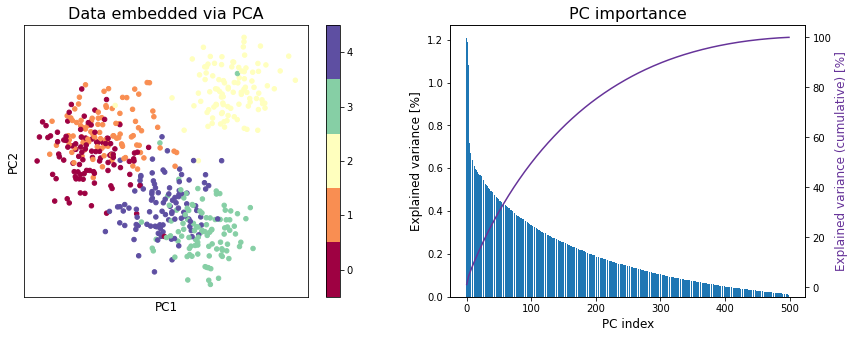

In [28]:
from matplotlib import pyplot as plt

fontsize_first  = 16
fontsize_second = 12

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].set_title('Data embedded via PCA', fontsize=fontsize_first)
axes[0].set_xlabel('PC1', fontsize=fontsize_second)
axes[0].set_ylabel('PC2', fontsize=fontsize_second)
img = axes[0].scatter(embedding[:, 0], embedding[:, 1], s=20, c=y, cmap='Spectral', alpha=1.0)
plt.setp(axes[0], xticks=[], yticks=[])
cbar = plt.colorbar(img, boundaries=np.arange(len(classes)+1)-0.5, ax=axes[0])
cbar.set_ticks(np.arange(len(classes)))
cbar.set_ticklabels(classes)

ax2 = axes[1].twinx()
axes[1].set_title('PC importance', fontsize=fontsize_first)
axes[1].set_xlabel('PC index', fontsize=fontsize_second)
axes[1].set_ylabel('Explained variance [%]', fontsize=fontsize_second)
ax2.set_ylabel('Explained variance (cumulative) [%]', fontsize=fontsize_second, color='rebeccapurple')
axes[1].bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_*100, width=0.8)
ax2.plot(np.cumsum(pca.explained_variance_ratio_)*100, color='rebeccapurple')

plt.show()

The beauty is: the PCs are **sorted** by importance!

We can look at the Explained variance and decide ow many to keep!<br>
_E.g. the first **k** components that together explain 50% of the variance_

<font size=3><u>**Non-linear methods: $t$-SNE and UMAP**</u><font>

The most known techniques are arguably:
> - **t-SNE** (_**t**-distributed **S**tochastic **N**eighbor **E**mbedding_)
> - **UMAP** (_**U**niform **M**anifold **A**pproximation and **P**rojection_)

They are **iterative**, **unsupervised** algorithms (although UMAP can be also used in **supervised** manner).

Their rationale briefly consists in

> _reducing to a lower-dimensional feature space (with a non-linear transformation)_,

while

> _arranging similar samples close to each other, and the dissimilar ones far away from each other_,

by assessing

>  _the similarity between data points in the original and in the final space._

Having said that, **UMAP** surclasses **$t$-SNE** in all aspects $\rightarrow$ it is mentioned because you may encounter it, but use **UMAP**.

<details>
<summary><b>[Spoiler]</b></summary>
<table><tr>
    <td width=640>
        <img src="images/tSNE_is_dead.png">
        <center>
            <br>
            Current existential status of $t$-SNE.
            <br>
            (From <a href="https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668">here</a>)
        </center>
    </td>
</tr></table>
</details>

Let's see UMAP in action with the [Galaxy10SDSS](https://astronn.readthedocs.io/en/latest/galaxy10sdss.html) dataset (200 MB)!

(A more complete example with this dataset can be found [here](https://umap-learn.readthedocs.io/en/latest/auto_examples/galaxy10sdss.html#sphx-glr-auto-examples-galaxy10sdss-py))

In [29]:
%%time

import os
import requests

from pathlib import Path
script_path = str(Path().absolute())
print('Current path:', script_path)

path_data = script_path + '/data'

# Downloading if dataset not found:
if not os.path.isfile(path_data+"/Galaxy10.h5"):
    url = "http://astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5"
    r = requests.get(url, allow_redirects=True)
    open(path_data+"/Galaxy10.h5", "wb").write(r.content)

Current path: /data/schools/Astrostatistics_School_Crete_2022/2022_summer_school/ML_Practices
CPU times: user 50.7 ms, sys: 8.16 ms, total: 58.8 ms
Wall time: 56.4 ms


Data type: images (21785 images)

Classes<br>
├── Class 0 (3461 images): Disk, Face-on, No Spiral<br>
├── Class 1 (6997 images): Smooth, Completely round<br>
├── Class 2 (6292 images): Smooth, in-between round<br>
├── Class 3 (394 images): Smooth, Cigar shaped<br>
├── Class 4 (1534 images): Disk, Edge-on, Rounded Bulge<br>
├── Class 5 (17 images): Disk, Edge-on, Boxy Bulge<br>
├── Class 6 (589 images): Disk, Edge-on, No Bulge<br>
├── Class 7 (1121 images): Disk, Face-on, Tight Spiral<br>
├── Class 8 (906 images): Disk, Face-on, Medium Spiral<br>
└── Class 9 (519 images): Disk, Face-on, Loose Spiral<br>

Image array shape: (21768, 69, 69, 3)

There are 9 classes
Each class contains ~349 galaxies
+-------------------------+
|        Data shape       |
+---------------+---------+
|       X       |    y    |
+---------------+---------+
| (1000, 14283) | (1000,) |
+---------------+---------+


pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
y                                                                               
0.0 0    10.0     4.0     4.0    10.0     3.0     3.0     8.0     1.0     2.0   
    1     3.0     5.0     2.0     7.0     9.0     6.0     9.0    11.0     8.0   
    2     1.0     1.0     0.0     2.0     2.0     0.0     4.0     4.0     2.0   
    3     2.0     2.0     0.0     1.0     1.0     0.0     4.0     4.0     2.0   
    4     4.0     4.0     2.0     5.0     5.0     2.0     8.0     9.0     4.0   

       pixel9  ...  pixel14274  pixel14275  pixel14276  pixel14277  \
y              ...                                                   
0.0 0     6.0  ...         9.0         8.0         6.0         9.0   
    1     8.0  ...         2.0         2.0         3.0         1.0   
    2     9.0  ...         7.0         5.0         6.0         3.0   
    3     5.0  ...        32.0        17.0         3.0        37.0   
    4     7.0  ...         4.0         4.0         3.0         1.0   

       pixel14278  pixel14279  pixel14280  pixel14281  pixel14282    y  
y                                                                       
0.0 0         8.0         6.0         9.0         8.0         6.0  0.0  
    1         1.0         0.0         1.0         1.0         0.0  0.0  
    2         1.0         2.0         2.0         0.0         1.0  0.0  
    3        21.0         8.0        44.0        24.0        14.0  0.0  
    4         1.0         0.0         3.0         3.0         2.0  0.0  

[5 rows x 14284 columns]

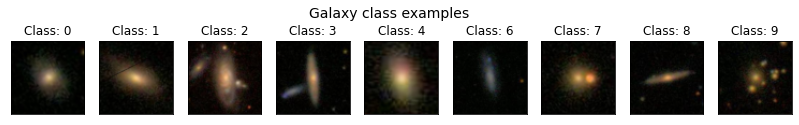

CPU times: user 5.03 s, sys: 2.41 s, total: 7.44 s
Wall time: 7.61 s


In [30]:
%%time

# Loading catalogue:
import h5py

with h5py.File(path_data+"/Galaxy10.h5", "r") as F:
    images = np.array(F["images"])
    y      = np.array(F["ans"])
    
# Dropping class 5, which only has 17 galaxies:
idxs_valid = np.where(y != 5)[0]
images = images[idxs_valid]
y      = y[idxs_valid]
    
print('Image array shape: %s\n' % str(np.shape(images)))

# Flattening images to 1D arrays (and casting to float):
X = images.reshape([len(images), np.shape(images)[1]*np.shape(images)[2]*np.shape(images)[3]])
X = X.astype(np.float32)
# TRICK: These are RGB images (integer values 0--256): we can convert to a
#        low-encoding float (16 instead of e.g. 64 bits) without losing information.

classes = sorted(np.unique(y))
print('There are %s classes' % len(classes))

feature_names = ["pixel"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data_orig = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Balancing classes using pandas:
#
# For each class, keeping as many objects as for the class with min number
# of objects ...
df_data_g = df_data_orig.groupby('y')
df_data = pd.DataFrame(df_data_g.apply(lambda x: x.sample(df_data_g.size().min()).reset_index(drop=True)))
# and re-exctracting the matrices after rebalancing ...
X = df_data[feature_names].values
y = df_data['y'].values

print('Each class contains ~%s galaxies' % int(round(len(y)/len(classes))))

# Keeping only a [random] subset of the data to speed up calculations:
n_samples_keep = 1000 # max: len(X)
idxs_keep = np.random.randint(len(X), size=n_samples_keep)
X = X[idxs_keep]
y = y[idxs_keep]

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

# Displaying first 5 rows:
display(df_data.head(5))

# Displaying one image for each class:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, len(classes), figsize=(14, 5))
plt.suptitle('Galaxy class examples', y=0.7, fontsize=14)

for i, classs in enumerate(classes):
    idx = np.where(y == classs)[0][0]
    # index of first galaxy in the list, for class <classs>
    ax = axes[i]
    ax.set_title('Class: %s' % classs)
    ax.imshow(images[idx])
    plt.setp(ax, xticks=[], yticks=[])
plt.show()

In [31]:
%%time
# For 1000 objects, this will take half a minute or so ...
import umap

mapper = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='euclidean')
embedding = mapper.fit_transform(X)
# NOTE: using default params

# For supervised transformation, add y (and witness the magic!):
#mapper = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='euclidean')
#embedding = mapper.fit_transform(X, y=y)
# ... but for now we are only displaying the data.

2022-07-12 12:46:33.310790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 12:46:33.310813: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


CPU times: user 18.7 s, sys: 859 ms, total: 19.5 s
Wall time: 14.8 s


<u>Parameters</u>:
> **n_neigbors** is the most important parameter $-$ it tells how much _locally_ the algorithm shall focus:
> - small n_neigbors $\rightarrow$ UMAP will produce plenty of localized clusters
> - large n_neighbors $\rightarrow$ UMAP will look at the global structure

> **min_dist**: minimum distance between embedded points:
> - small min_dist $\rightarrow$ more clustered/clumped embedding
> - large min_dist $\rightarrow$ more even dispersal of points

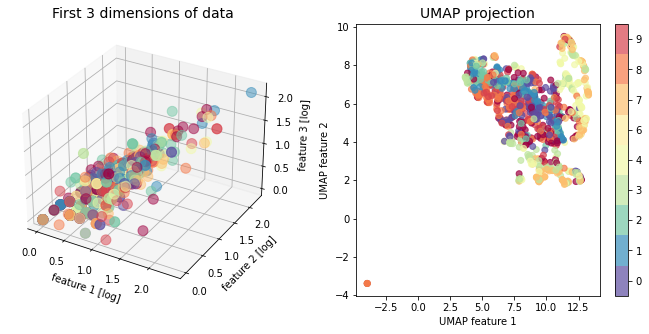

In [32]:
def plot_original_vs_UMAP(X, y, embedding, title='UMAP projection'):
    
    n_components = np.shape(embedding)[1]
    
    fontsize_title = 14
    cmap = 'Spectral_r'
    
    fig = plt.figure(figsize=(12, 5))
    
    ax0 = fig.add_subplot(121,  projection='3d')
    ax0.set_title('First 3 dimensions of data', fontsize=fontsize_title)
    img0 = ax0.scatter(np.log10(X[:,0]+1), np.log10(X[:,1]+1), np.log10(X[:,2]+1), c=y, s=100, alpha=0.5, cmap=cmap)
    # NOTE: The "+ 1" is to avoid issues with log(0) 
    ax0.set_xlabel('feature 1 [log]')
    ax0.set_ylabel('feature 2 [log]')
    ax0.set_zlabel('feature 3 [log]')
    
    if n_components == 1:
        ax1 = fig.add_subplot(122)
        img1 = ax1.scatter(embedding[:,0], range(len(embedding)), c=y, cmap=cmap)
    if n_components == 2:
        ax1 = fig.add_subplot(122)
        img1 = ax1.scatter(embedding[:,0], embedding[:,1], c=y, cmap=cmap, alpha=0.7)
    if n_components == 3:
        ax1 = fig.add_subplot(122, projection='3d')
        img1 = ax1.scatter(embedding[:,0], embedding[:,1], embedding[:,2], c=y, s=100, cmap=cmap)
    
    ax1.set_title(title, fontsize=fontsize_title)
    ax1.set_xlabel('UMAP feature 1')
    ax1.set_ylabel('UMAP feature 2')
    
    cbar = plt.colorbar(img1, boundaries=np.arange(len(classes)+1)-0.5)
    cbar.set_ticks(np.arange(len(classes)))
    cbar.set_ticklabels(classes)
    
    plt.show()    

plot_original_vs_UMAP(X, y, embedding)

<u>What we observe:</u>

- The different classes are mildly separated, but anyways more separated than in the original data

- UMAP creates an embedding space with smooth transitions from a class to the next<br>

_This welcome since contiguous morphological classes are indeed similar (i.e., there is a smooth transition from class 0, to 1, to 2, etc.)_

Notice that, here, UMAP did <u>not</u> use the information about the labels: we added the colors only in the plot.


<u>UMAP mapping is reversible!</u>

Given an embedded point (x, y), we can reconstruct a fake image by inverse transformation!<br>
We expect this fake galaxy to look like the dominant class nearby the chosen point.

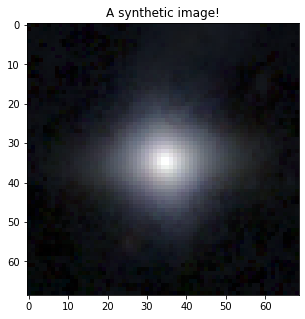

In [33]:
embedding_point = (1, 1)
embedding_point = np.array([embedding_point])
X_fake = mapper.inverse_transform(embedding_point)
# NOTE: scikit-learn transformations always return 2D arrays, even when there
#       is only 1 object

images_fake = X_fake.reshape([len(embedding_point), np.shape(images)[1], np.shape(images)[2], np.shape(images)[3]])

# Normalizing for RGB representation:
mins = np.min(images_fake[:,:,:,:],axis=(1,2))
maxs = np.max(images_fake[:,:,:,:],axis=(1,2))
images_fake_n = (images_fake - mins)/(maxs - mins)

plt.title('A synthetic image!')
plt.imshow(images_fake_n[0])
plt.show()

Et voilà: your trained UMAP is actually a galaxy class image generator!

<u>Hyperparameters:</u>

Let's see how UMAP behaves when varying the **n_neighbors** parameter.<br>

WARNING: Computational time rapidly grows with n_neighbors!

/home/peblo/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


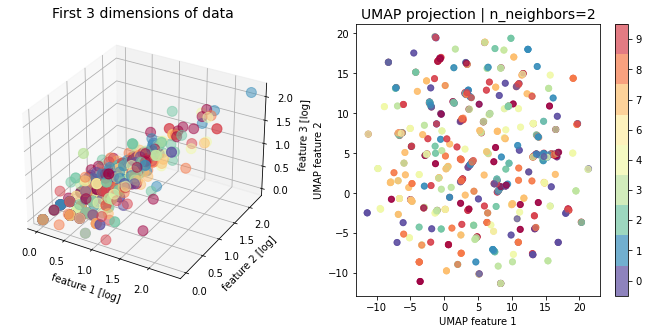

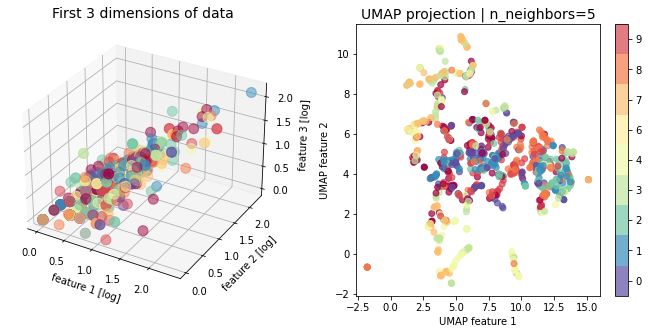

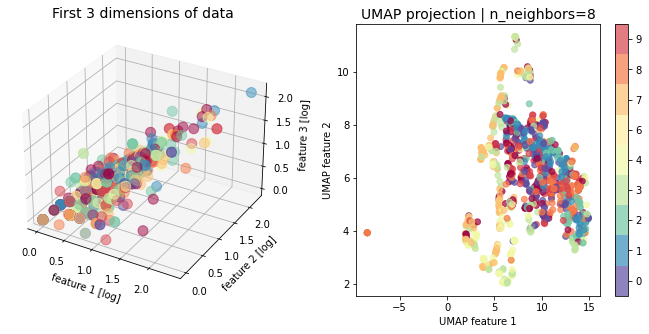

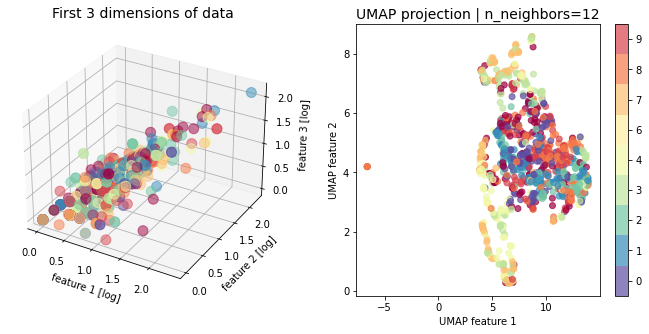

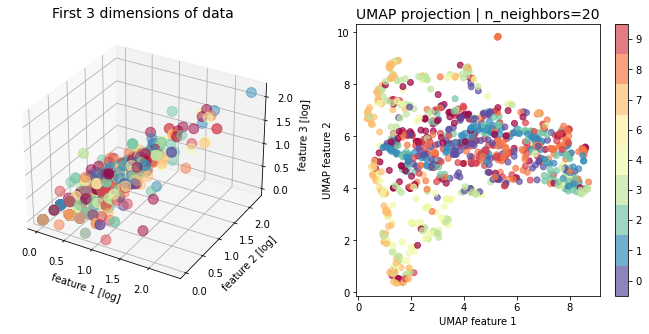

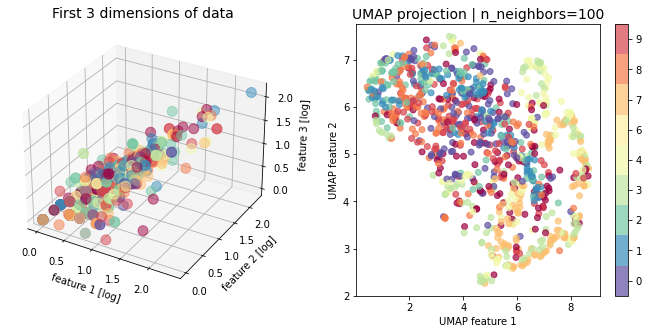

CPU times: user 59.9 s, sys: 4.93 s, total: 1min 4s
Wall time: 33.4 s


In [34]:
%%time
# For 1000 objects, this will take couple of minutes or so ...

import umap

# Suggested range, from the documentation: 2 to 100
for n_neighbors in (2, 5, 8, 12, 20, 100):
    embedding = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=0.1, metric='euclidean').fit_transform(X)
    plot_original_vs_UMAP(X, y, embedding, 'UMAP projection | n_neighbors=%s' % n_neighbors)

How to choose the right n_neighbors?
It depends on the task, but $\rightarrow$ see [Hyperparameter tuning](#hyperparameter_tuning)

<u>Conclusions:</u>

**PROS**:
1. Quite fast (not as PCA, though)
2. Adaptable to any problem with numerical features
3. Can be used in unsupervised or supervised mode (see [here](https://umap-learn.readthedocs.io/en/latest/supervised.html#:~:text=While%20UMAP%20can%20be%20used,reduction%2C%20and%20even%20metric%20learning))
4. Will make you look cool with your Biologist friends

**CONS:**
1. Cluster distances in embedding space not representative of cluster differences (consequence of _non-linearity_ and _locality_)
2. It uses Stochastic Gradient Descent $\rightarrow$ stochasticity (re-running lead to slightly different results)
3. Tricky hyperparameter tuning: small variations lead to great embedding differences

TLDR: Use it only for **visualization**, and for clustering/classification <u>only once you understand it</u> inside-out!

<u>Studying material:</u><br>

Fantastic introductory videos by _StatQuest_:
- **_t_-SNE**: https://www.youtube.com/watch?v=NEaUSP4YerM
- **UMAP**: https://www.youtube.com/watch?v=eN0wFzBA4Sc 

Original **UMAP** paper:<br>
[-] [McInnes, Healy & Melville, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/abs/1802.03426)<br>

Python **UMAP** documentation:<br>
[-] [Official website](https://umap-learn.readthedocs.io/en/latest/)<br>
[-] [Parameters](https://umap-learn.readthedocs.io/en/latest/api.html)

Other info and Python dimensionality reduction tools:<br>
[-] [How exactly UMAP works](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)<br>
[-] [Dimensionality Reduction Toolbox](https://towardsdatascience.com/dimensionality-reduction-toolbox-in-python-9a18995927cd)<br>

<font size=3><u>Comparison: PCA $vs$ UMAP</u><font>
    
Let's try to compare the performances of **PCA** and **UMAP** on a realistic dataset.
    
For this exercise we will use the **S**tar **F**ormation **R**eference **S**urvey (**SFRS**) morphological catalogue
[Bonfini et al. 2021](https://ui.adsabs.harvard.edu/abs/2021MNRAS.504.3831B/abstract).

In [35]:
# Loading the Star Formation Reference Survey morphological catalogue (Bonfini+21):

import pandas as pd

from pathlib import Path
script_path = str(Path().absolute())
print('Current path:', script_path)

path_data = script_path + '/data'

df_catalogue = pd.read_csv(path_data+'/'+'SFRS_morph.tsv', sep='|', comment='#')
display(df_catalogue.head(100))
print('Columns:', df_catalogue.columns.values)
print(len(df_catalogue), 'rows')

Current path: /data/schools/Astrostatistics_School_Crete_2022/2022_summer_school/ML_Practices


,Name,Kmag,e_Kmag,Model,Comp,Phys,n,R,Kcorr,LK,...,M/L,M/Lgal,M,Mgal,Method,B/T,e_B/T,Dist,Nuc,Weight
0,IC2217,11.56,0.12,Sersic+exDisk,Sersic,bulge,4.0,8.1,0.969,1.480000e+43,...,0.897,0.720,2.67e+10,4.510000e+10,GALFIT,0.473,0.125,76100000.0,HII,13.2
1,IC2217,11.44,0.07,Sersic+exDisk,exDisk,disk,,5.9,0.969,1.650000e+43,...,0.743,0.720,2.47e+10,4.510000e+10,GALFIT,0.473,0.125,76100000.0,HII,13.2
2,NGC2500,8.51,0.04,Sersic+psfAgn,Sersic,disk,1.8,89.1,0.980,9.630000e+42,...,0.730,0.784,1.41e+10,1.520000e+10,GALFIT,0.001,0.001,15000000.0,LINER,4.2
3,NGC2500,16.07,0.13,Sersic+psfAgn,psfAgn,bulge,,,0.980,9.120000e+39,...,1.410,0.784,2.59e+07,1.520000e+10,GALFIT,0.001,0.001,15000000.0,LINER,4.2
4,NGC2512,9.92,0.04,Sersic+psfAgn,Sersic,disk,1.5,14.0,0.962,5.510000e+43,...,0.830,0.849,9.20e+10,1.030000e+11,GALFIT,0.089,0.009,69300000.0,HII,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NGC3015,10.86,0.05,Sersic+psfAgn + exDisk,exDisk,disk,,2.7,0.942,5.600000e+43,...,0.803,0.832,9.05e+10,1.120000e+11,GALFIT,0.162,0.161,109000000.0,TO,7.4
96,MCG2-25-039,11.32,0.03,Sersic,Sersic,mixed,1.7,5.2,0.954,1.890000e+43,...,,0.800,,3.040000e+10,C->B/T,0.181,0.048,77600000.0,HII,4.7
97,NGC3020,10.41,0.05,Sersic+psfAgn,Sersic,disk,1.7,37.4,0.995,2.530000e+42,...,0.679,0.701,3.46e+09,3.570000e+09,GALFIT,0.004,0.014,18300000.0,HII,3.0
98,NGC3020,16.29,0.23,Sersic+psfAgn,psfAgn,bulge,,,0.995,1.130000e+40,...,0.618,0.701,1.41e+07,3.570000e+09,GALFIT,0.004,0.014,18300000.0,HII,3.0


Columns: ['Name' 'Kmag' 'e_Kmag' 'Model' 'Comp' 'Phys' 'n' 'R' 'Kcorr' 'LK' 'u-r'
 'M/L' 'M/Lgal' 'M' 'Mgal' 'Method' 'B/T' 'e_B/T' 'Dist' 'Nuc' 'Weight']
573 rows


The catalogue contains morphological decomposition for ~**350 galaxies** of different star-formation activity.

Along with the total masses, luminosities, etc., there are measurements for the individual morphological components (e.g. bulge, disk).  That means that for each galaxy there is more than one line in the catalogue, one per component, where the integrated quantities for the galaxy are repeated, while the ones for the individual component change.

We will get rid of the information regarding the components, and only keep the integrated quantities.

In [36]:
# > Minor manipulations, just to make the problem sensible and interesting

import re
import numpy as np

# Replacing spaces in with averages, for all the numerical features:
for feature in ['Kmag', 'e_Kmag', 'n', 'R', 'Kcorr', 'u-r', 'M/L', 'M', 'Mgal', 'B/T', 'e_B/T', 'Dist', 'Weight']:
    
    # Some numerical columns are incorrectly loaded by pandas as 'object' type
    # (instead of 'float').  This happens e.g. when there are missing values.
    # Therefore, we first need some workaround to convert them to float:
    if df_catalogue[feature].dtypes != float:
        df_catalogue[feature] = df_catalogue[feature].apply(lambda x: np.nan if re.match(r"^\s+$", x) else x)
        df_catalogue[feature] = df_catalogue[feature].astype(np.float64)
    
    df_catalogue[feature] = df_catalogue[feature].apply(lambda x: np.nanmean(df_catalogue[feature]) if np.isnan(x) else x)

# Dropping categorical features (not usable by PCA or UMAP):
df_catalogue = df_catalogue.drop(['Comp', 'Phys', 'Method'], axis=1)

# Dropping irrelevant numerical features referring to a galaxy sub-component:
df_catalogue = df_catalogue.drop(['n', 'R', 'LK', 'u-r', 'M', 'M/L'], axis=1)

# Keeping one line per galaxy (we already dropped the sub-component columns anyways):
df_catalogue = df_catalogue.drop_duplicates(["Name", "Model"])

# Taking log of large numbers to speed up calculations:
df_catalogue['Mgal'] = np.log10(df_catalogue['Mgal'])

display(df_catalogue.head(100))
print(len(df_catalogue), 'rows')

,Name,Kmag,e_Kmag,Model,Kcorr,M/Lgal,Mgal,B/T,e_B/T,Dist,Nuc,Weight
0,IC2217,11.56,0.12,Sersic+exDisk,0.969,0.720,10.654177,0.473,0.125,76100000.0,HII,13.2
2,NGC2500,8.51,0.04,Sersic+psfAgn,0.980,0.784,10.181844,0.001,0.001,15000000.0,LINER,4.2
4,NGC2512,9.92,0.04,Sersic+psfAgn,0.962,0.849,11.012837,0.089,0.009,69300000.0,HII,7.4
6,MCG6-18-009,10.49,0.04,Sersic,0.924,0.788,11.445604,0.204,0.054,164000000.0,HII,1.5
7,MK1212,11.57,0.04,Sersic,0.928,0.774,11.053078,0.184,0.049,173000000.0,HII,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...
158,NGC3430,12.22,0.05,Sersic+exDisk,0.988,0.877,10.648360,0.045,0.017,28400000.0,HII,22.2
160,CGCG95-055,11.58,0.06,Sersic+psfAgn,0.982,0.910,9.547775,0.127,0.065,25700000.0,SN,1.5
162,IRAS10565+2448W,11.46,0.04,Sersic_n4,0.905,0.865,11.193125,1.000,0.265,185000000.0,SN,15.5
163,UGC6074,12.19,0.05,Sersic+exDisk,0.981,1.002,10.267172,0.227,0.073,38000000.0,HII,6.9


335 rows


In [37]:
X = df_catalogue.loc[:, df_catalogue.dtypes == float].values
# float values become our predictive variables
labels = df_catalogue['Model'].values
# here we can choose to classify based on either of:
# - 'Model' (i.e. morphological type)
# - 'Nuc' (i.e. classification of the galaxy's nucleus)

classes = np.unique(labels)
print('There are %s classes' % len(classes))

# Encoding 'Galaxy' label into integers [0, 1, ..]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(labels)

from prettytable import PrettyTable

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

There are 7 classes
+-------------------+
|     Data shape    |
+----------+--------+
|    X     |   y    |
+----------+--------+
| (335, 9) | (335,) |
+----------+--------+


In [38]:
# Normalizing data (necessary for PCA):
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_n = scaler.fit_transform(X)

In [39]:
%%time

# PCA:
from sklearn.decomposition import PCA
pca = PCA()
embedding_PCA = pca.fit_transform(X_n)

CPU times: user 3.83 ms, sys: 0 ns, total: 3.83 ms
Wall time: 2.43 ms


In [40]:
%%time

# UMAP:
import umap
umapper = umap.UMAP(n_neighbors=10, n_components=2, min_dist=1, spread=3, metric='euclidean')
embedding_UMAP = umapper.fit_transform(X_n)

CPU times: user 3.44 s, sys: 0 ns, total: 3.44 s
Wall time: 2.16 s


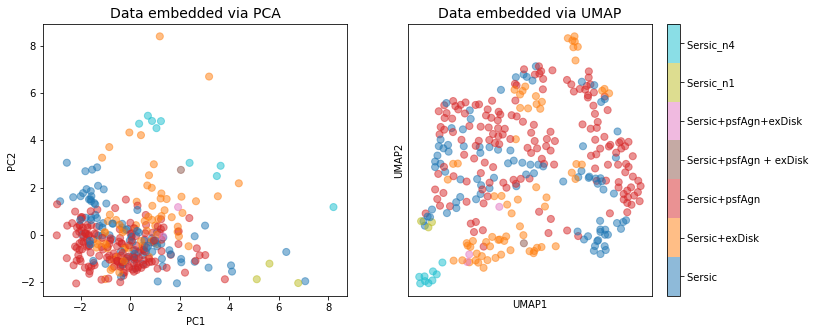

In [41]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fontsize_title = 14
cmap = 'tab10'

# PCA:
ax0 = axes[0]
ax0.set_title('Data embedded via PCA', fontsize=fontsize_title)

img0 = ax0.scatter(embedding_PCA[:, 0], embedding_PCA[:, 1], s=50, c=y, cmap=cmap, alpha=0.5)
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')

# UMAP:
ax1 = axes[1]
ax1.set_title('Data embedded via UMAP', fontsize=fontsize_title)

img1 = ax1.scatter(embedding_UMAP[:, 0], embedding_UMAP[:, 1], s=50, c=y, cmap=cmap, alpha=0.5)
ax1.set_xlabel('UMAP1')
ax1.set_ylabel('UMAP2')

#for ax, img in zip([ax0, ax1], [img0, img1]): # to repeat colorbar for both panels
ax = ax1
img = img1
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(img, boundaries=np.arange(len(classes)+1)-0.5, ax=ax)
cbar.set_ticks(np.arange(len(classes)))
cbar.set_ticklabels(classes)

plt.show()

UMAP does a better job in isolating one or two classes (e.g. Sersic$_{n1}$), and also reduces the overlap between Sersic, Sersic+psfAgn, and Sersic+exDisk.

As an additional step, we might try to retain 3 embedded components (instead of 2) to preserve additional information.  Maybe a classifier trained on those 3 variables may achieve complete separation of the classes!

## Data Preparation

Aside from Encoding, Scaling, and Feature Engeneering, more generically one might need to perform other **Data Preparation** steps.

This includes:

- **Inputing** missing values

- Removing **outliers** (?)

- Dealing with **imbalanced classes**

- Handling numerical **exceptions** (zeros!)

... and many more!

Have a look at this [post about Data Cleaning](https://towardsdatascience.com/automated-data-cleaning-with-python-94d44d854423) as a starting point! 

# Cross Validation (a.k.a. $k$-fold Cross Validation)

    Am I overfitting the train set?

This is a common doubt when we split our data in just a **train**, [a **validation**] and a **test** set (as seen [before](#Golden-rule-and-data-splitting)).

Would the results change if we shuffled the data differently?

- - -

**Cross Validation** is a tecnique used assess how a model would generalize to unseen data.

It involves _re-fitting_ the model over different partitionings of the dataset:

<table><tr>
    <td width=800>
        <img src="images/CV_k4.jpg">
        <center>
            <br>
            Figure 5.  Data splitting for a Cross Validation with $k = 4$ folds.
        </center>
    </td>
</tr></table>

A **$k$-fold CV** splits the data in $k$ parts (**folds**), and, at each iteration:
   - uses **$k$-1** folds for training
   - uses the **remaining** fold for testing (_although we indistinctively call it **validation** set, in this context_)

The model is tested $k$ times, always on unseen data.

In this way, CV actually tackles 2 issues:

- Assessment of **bias**<br>
  _(i.e. how much the model depends on a specific training set)_

- Exploitation of the **whole dataset**<br>
  _(i.e. all data are eventually used for both training and testing)_

Each model fit produces a performance score, therefore we can obtain both an **average** estimate, and a **uncertainty** on it.

<u>IMPORTANT:</u> While the CV gives performance estimates, the final model shall be _re_-trained on **all** the data.<br>
$~~~~~~~~~~~~~~~~~~~$ We can reasonably assume that the re-trained model will be at least as performing as the CV average.<br>
$~~~~~~~~~~~~~~~~~~~$ (Actually, you shall _re_-fit on all data also when you use the simpler [train/validation/test](#Golden-rule-and-data-splitting) protocol).

- - -

**Q:** What is the right $k$?<br> 
**R:** Common values range between 3 and 10, but depends on:
- how many data we have<br>
- how much time we have<br>

because for larger $k$ we got more estimates, but in exchange we get:

- a smaller test set at each iteration
- more computations


<font size=3><u>**Variants**</u><font>

- **Repeated CV**: CV, but repeated $n$ times with different shuffling

- **Stratified CV**: CV, but the demographics of each fold is representative of the data (e.g. same class demoographics)

## Hyperparameter tuning
<a id='hyperparameter_tuning'></a>

CV can be used to **select** the best hyperparameters of a model $-$ i.e., to perform **hyperparameter tuning**.

E.g., consider <code>sklearn.ensemble</code> Random Forests parameters:
- <code>n_estimators</code> (_the number of trees_)
- <code>max_depth</code> (_the _max ramification of the trees_)
- <code>max_features</code> (_the max number of features to consider in each split_)

We want to find the specific set of these hyperparameters (**configuration**) which maximizes the score on a validation set. 

To do this, we simply have to <u>train each configuration</u> at each CV folding, and <u>record</u> their score on the validation fold:

<table><tr>
    <td width=640>
        <img src="images/Hyperpar_Tuning.png">
        <center>
            <br>
            Figure 6.  CV protocol used for hyperparameter tuning.<br>
            (From <a href="https://scikit-learn.org/stable/modules/cross_validation.html">here</a>)
        </center>
    </td>
</tr></table>

$\rightarrow$ The **best** configuration is the one that on _average_ returns the best score.

E.g. if we want to try:

- <code>n_estimators</code> = [10, 50]
- <code>max_depth</code> = [2, 8]
- <code>max_features</code> = [3, 6]

that is 2$^3$ = 8 configurations, on a 4-fold CV $\rightarrow$ we will train 8 x 4 + 1 = 33 models.

_NOTE: The final "+1" is because the selected configuration is **retrained on all data**._

- - -

<u>IMPORTANT:</u> You <u>cannot</u> use your data to tune the hyperparameters _**and**_ to assess the performance $\rightarrow$ we would _overfit_.<br>
$~~~~~~~~~~~~~~~~~~$ To assess the final performance, we need a **hold-out** test set (just like in Figure 6).

We will come back to this in the _ML Practices Workshop_.